In [38]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import cmath

In [39]:
def solver(A, b):
    Q, R = la.qr(A, mode='economic')
    y = Q.T@b
    return la.solve_triangular(R, y)

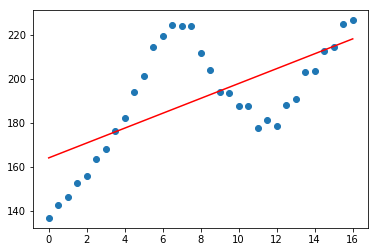

In [40]:
data = np.load('../housing.npy')
A = np.hstack((np.vstack(data[:, 0]), np.ones_like(np.vstack(data[:, 0]))))
b = data[:, 1]
alpha, beta = solver(A, b)
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], alpha * data[:, 0] + beta, 'r')
plt.show()

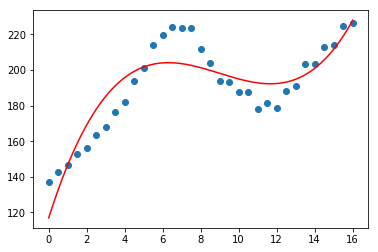

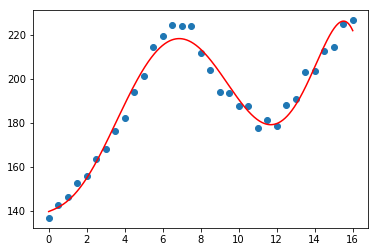

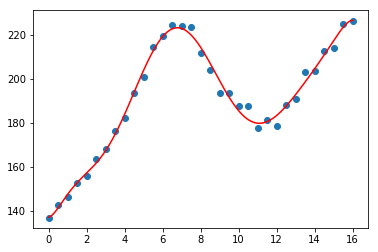

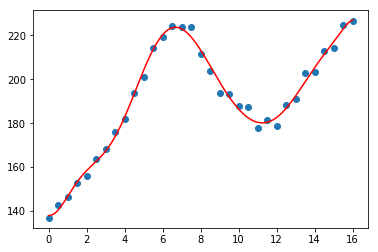

In [41]:
def degree(n):
    domain = data[:, 0]
    smooth = np.linspace(domain[0], domain[-1], 1000)
    x = np.vstack(domain)
    A = np.hstack((x**i for i in range(n, -1, -1)))
    b = data[:, 1]
    coefs = la.lstsq(A, b)[0][::-1]
    plt.scatter(domain, data[:, 1])
    plt.plot(smooth, sum((coefs[i] * (smooth ** i) for i in range(n + 1))), 'r')
    plt.show()
    
degree(3)
degree(6)
degree(9)
degree(12)

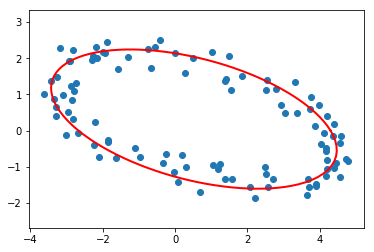

In [42]:
new_data = np.load('../ellipse.npy')
x = np.vstack(new_data[:, 0])
y = np.vstack(new_data[:, 1])
A = np.hstack((x ** 2, x, x * y, y, y ** 2))
b = np.ones_like(x)
coefs = solver(A, b)

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, 'r', lw=2)
    plt.gca().set_aspect("equal", "datalim")

plt.scatter(new_data[:, 0], new_data[:, 1])
plot_ellipse(*coefs)
plt.show()

In [43]:
def eigen_finder1(A, N, tol):
    m, n = np.shape(A)
    x = np.random.random(n)
    x /= la.norm(x)
    for k in range(1, N):
        x_prime = A@x
        if la.norm(x_prime - x) < tol or la.norm(x_prime) == 0:
            break
        x_prime /= la.norm(x_prime)
        x = x_prime
    return x.T@A@x, x

A = np.random.random((10,10))
# Compute the eigenvalues and eigenvectors of A via SciPy.
eigs, vecs = la.eig(A)
# Get the dominant eigenvalue and eigenvector of A.
# The eigenvector of the kth eigenvalue is the kth column of 'vecs'.
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]
# Verify that Ax = lambda x.
print(np.allclose(A.dot(x), lamb*x))

lamb1, x1 = eigen_finder1(A, 10000, 1e-13)
print(np.allclose(A.dot(x1), lamb1*x1))

True
True


In [44]:
def eigen_finder2(A, N, tol):
    m, n = np.shape(A)
    S = la.hessenberg(A)
    for k in range(N):
        Q, R = la.qr(S, mode='economic')
        S = R@Q
    eigs = []
    i = 0
    while i < n:
        if i == n - 1 or S[i + 1, i] < tol:
            eigs.append(S[i, i])
        else:
            b = -(S[i, i] + S[i+1, i+1])
            plus_lamb = (-b + cmath.sqrt(b ** 2 - 4(S[i, i] * S[i+1, i+1] - S[i, i+1] * S[i+1, i]))) / 2
            minus_lamb = (-b - cmath.sqrt(b ** 2 - 4(S[i, i] * S[i+1, i+1] - S[i, i+1] * S[i+1, i]))) / 2
            eigs.append(plus_lamb)
            eigs.append(minus_lamb)
            i += 1
        i += 1
    return eigs